# Assignment 1:
### - The automated_stat_analyzer Function
- Scenario: A retail company needs a utility to quickly summarize sales data. Students must create a function that identifies the 
"Central Tendency" and "Dispersion" of any numerical column.
- ### Requirements:

* Accept a Pandas DataFrame and a column name.

* Calculate the Mean, Median, and Standard Deviation .

* Identify if the data is "Skewed" by comparing the Mean and Median.


* Bonus: If the column is categorical, return the Mode instead.

### Your Data

In [44]:
import pandas as pd
import numpy as np

# Create a synthetic Company Sales Dataset
data = {
    'Transaction_ID': range(1, 11),
    'Product_Category': ['Electronics', 'Home', 'Electronics', 'Sports', 'Home', 
                         'Electronics', 'Home', 'Sports', 'Electronics', 'Electronics'],
    'Sales_Amount': [150, 200, 155, 300, 210, 180, 205, 1000, 190, 160], # 1000 is an Outlier
    'Customer_Age': [25, 34, np.nan, 45, 23, 31, 29, np.nan, 38, 40],    # Contains Nulls (NaN)
    'Rating': [5, 4, 3, 5, 2, 4, 5, 2, 4, 3]
}

df_test = pd.DataFrame(data)

# Save to CSV for students to practice loading files [cite: 74]
df_test.to_csv('company_sales_test.csv', index=False)
print("Test dataset created successfully!")

Test dataset created successfully!


In [45]:
df_test = pd.DataFrame(data)
df_test

,Transaction_ID,Product_Category,Sales_Amount,Customer_Age,Rating
0,1,Electronics,150,25.0,5
1,2,Home,200,34.0,4
2,3,Electronics,155,NaN,3
3,4,Sports,300,45.0,5
4,5,Home,210,23.0,2
5,6,Electronics,180,31.0,4
6,7,Home,205,29.0,5
7,8,Sports,1000,NaN,2
8,9,Electronics,190,38.0,4
9,10,Electronics,160,40.0,3


In [46]:
def cck_type(df_test=df_test):
    return pd.DataFrame({'nunique': df_test.nunique(), 'dtype': df_test.dtypes}).T
cck_type()

,Transaction_ID,Product_Category,Sales_Amount,Customer_Age,Rating
nunique,10,3,10,8,4
dtype,int64,object,int64,float64,int64


In [47]:
df_test.drop('Transaction_ID', axis=1, inplace=True)

In [48]:
df_test.isnull().sum()

Product_Category    0
Sales_Amount        0
Customer_Age        2
Rating              0
dtype: int64

In [49]:
median=df_test['Customer_Age'].median()
df_test['Customer_Age'].fillna(median, inplace=True)         

C:\Users\el_bostan\AppData\Local\Temp\ipykernel_15600\2659774402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Customer_Age'].fillna(median, inplace=True)


In [50]:
df_test

,Product_Category,Sales_Amount,Customer_Age,Rating
0,Electronics,150,25.0,5
1,Home,200,34.0,4
2,Electronics,155,32.5,3
3,Sports,300,45.0,5
4,Home,210,23.0,2
5,Electronics,180,31.0,4
6,Home,205,29.0,5
7,Sports,1000,32.5,2
8,Electronics,190,38.0,4
9,Electronics,160,40.0,3


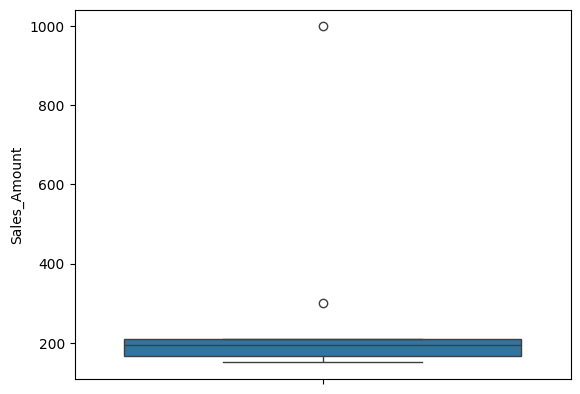

In [53]:
#check outlier in Sales_Amount
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df_test['Sales_Amount'])
plt.show()

In [54]:
# Remove Outliers in 'Sales_Amount' using IQR method
Q1 = df_test['Sales_Amount'].quantile(0.25)
Q3 = df_test['Sales_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_test = df_test[(df_test['Sales_Amount'] >= lower_bound) & (df_test['Sales_Amount'] <= upper_bound)]

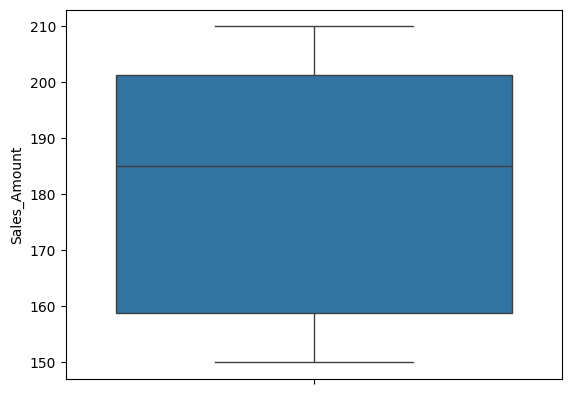

In [55]:
#check outlier in Sales_Amount
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df_test['Sales_Amount'])
plt.show()

In [56]:
df_test

,Product_Category,Sales_Amount,Customer_Age,Rating
0,Electronics,150,25.0,5
1,Home,200,34.0,4
2,Electronics,155,32.5,3
4,Home,210,23.0,2
5,Electronics,180,31.0,4
6,Home,205,29.0,5
8,Electronics,190,38.0,4
9,Electronics,160,40.0,3


In [57]:

def automated_stat_analyzer(df, column_name):
    """
    Company Task: Provide a summary report of a specific data variable.
    
    Instructions:
    1. Check if the column is numerical or categorical.
    2. For numerical: Calculate Mean, Median, and Standard Deviation.
    3. For categorical: Calculate the Mode.
    4. Return a dictionary with these statistical measures.
    """
    # TODO: Implement using df[column_name].mean(), .median(), .std(), or .mode()  you can used Sales_Amount for your test case
    if pd.api.types.is_numeric_dtype(df[column_name]):
        mean = df[column_name].mean()
        median = df[column_name].median()
        std_dev = df[column_name].std()
        return {
            'Mean': mean,
            'Median': median,
            'Standard Deviation': std_dev
        }
    else:
        mode = df[column_name].mode()[0]
        return {
            'Mode': mode
        }
  

## Assignment 2: 
  ### The null_handling_strategy Function


#### Scenario: Incoming user data often has missing values.Students must implement a flexible strategy to handle these "Null Values" to prepare data for Machine Learning.
### Requirements:

* Check for null values in the DataFrame.

* Apply a strategy based on parameters: "drop_rows", "fill_mean", or "fill_median" .

* Ensure the function only fills numerical columns when using mean or median.

In [ ]:
def null_handling_strategy(df, strategy="fill_mean"):
    """
    Company Task: Clean a dataset by resolving missing (NaN) values.
    """
    # TODO: Implement using .isnull(), .dropna(), or .fillna() you can used Customer_Age for your test case
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if strategy == "fill_mean" and pd.api.types.is_numeric_dtype(df[column]):
                mean_value = df[column].mean()
                df[column].fillna(mean_value, inplace=True)
            elif strategy == "fill_median" and pd.api.types.is_numeric_dtype(df[column]):
                median_value = df[column].median()
                df[column].fillna(median_value, inplace=True)
            elif strategy == "drop":
                df.dropna(subset=[column], inplace=True)
    

In [58]:
df_test

,Product_Category,Sales_Amount,Customer_Age,Rating
0,Electronics,150,25.0,5
1,Home,200,34.0,4
2,Electronics,155,32.5,3
4,Home,210,23.0,2
5,Electronics,180,31.0,4
6,Home,205,29.0,5
8,Electronics,190,38.0,4
9,Electronics,160,40.0,3
